1. Ability of the strategies to reduce risks

Performance Metrics:

- Equal Weight:
- Total Return: 0.404
- Standard Deviation: 0.013
- Minimum Value: 0.922
- Observation: This strategy had the highest return during the training period, with moderate risk levels as indicated by the standard deviation. Its minimum value suggests relatively strong resilience in a downturn.
- Risk Parity:
- Total Return: 0.354
- Standard Deviation: 0.011
- Minimum Value: 0.935
- Observation: The risk parity strategy reduced risk effectively (lowest standard deviation and highest minimum value), but this came at the cost of slightly lower returns compared to Equal Weight.
- Equal Weight PCA:
- Total Return: 0.173
- Standard Deviation: 0.016
- Minimum Value: 0.883
- Observation: The PCA-based strategy produced relatively lower returns with the highest risk (as indicated by standard deviation and minimum value). This suggests that the principal components retained may not have been optimal for maximizing returns.
- Diversified Risk Parity:
- Total Return: 0.038
- Standard Deviation: 0.012
- Minimum Value: 0.851
- Observation: This strategy achieved the lowest return, but its standard deviation was relatively low, reflecting its focus on reducing systemic risk by diversifying across principal components.

Beta Coefficient:

- Equal Weight: Beta = 1.513 (Highest exposure to market risk)
- Risk Parity: Beta = 1.277
- Equal Weight PCA: Beta = 1.362
- Diversified Risk Parity: Beta = 0.776 (Lowest exposure to market risk)
- Observation: Beta values indicate that the Diversified Risk Parity strategy had the least sensitivity to market movements, consistent with its risk-reduction goal.

2. Test Period Results

Test Period Return:

- Equal Weight: 0.068
- Risk Parity: 0.049
- Equal Weight PCA: 0.082
- Diversified Risk Parity: 0.101
- Observation:
- The test period showed a reversal in performance trends. Diversified Risk Parity outperformed other strategies, suggesting it might be better suited for volatile or uncertain market conditions.
- Equal Weight and Risk Parity strategies performed reasonably well but underperformed compared to PCA-based strategies in the test period.

3. Comments on Diversification Strategies

(A) Stock Investment with Equal Weight:

This strategy is straightforward and performs well during bullish markets due to equal allocation across all assets. However, it is sensitive to market-wide downturns due to high Beta.

(B) Risk Parity:

This strategy balances risk by allocating based on standard deviation. It effectively reduces volatility and protects against downside risks, as seen in the highest minimum value and lowest standard deviation.

(C) Equal Weight PCA:

This strategy leverages the principal components of the correlation matrix but struggles during training due to suboptimal component selection or weights. However, it shows promising results during testing, highlighting its adaptability in different market conditions.

(D) Diversified Risk Parity:

This strategy allocates capital based on principal component variances. It sacrifices returns during training but exhibits resilience and high returns during testing, showcasing its risk management efficiency.

4. Key Insights

	1.	Equal Weight is effective in bullish conditions but has high market risk.
	2.	Risk Parity excels in reducing risk and maintaining stable returns.
	3.	PCA-based strategies, though initially underwhelming, can adapt to varying market conditions, as shown in test results.
	4.	Diversified Risk Parity achieves its goal of reducing systemic risk, with promising performance during volatile periods.


/Users/liuliangjie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


Correlation Matrix:
 Ticker      AAPL      AMZN      AVGO     BRK-B      GOOG       LLY      META  \
Ticker                                                                         
AAPL    1.000000  0.304776  0.351940  0.179695  0.395028  0.125628  0.286125   
AMZN    0.304776  1.000000  0.404702  0.179945  0.550767  0.226604  0.613730   
AVGO    0.351940  0.404702  1.000000  0.031686  0.309192  0.205437  0.408433   
BRK-B   0.179695  0.179945  0.031686  1.000000  0.237695  0.103420  0.193727   
GOOG    0.395028  0.550767  0.309192  0.237695  1.000000  0.158247  0.443519   
LLY     0.125628  0.226604  0.205437  0.103420  0.158247  1.000000  0.216619   
META    0.286125  0.613730  0.408433  0.193727  0.443519  0.216619  1.000000   
MSFT    0.470654  0.590775  0.456361  0.220039  0.529680  0.215814  0.594026   
NVDA    0.283327  0.458525  0.678352 -0.003198  0.366382  0.285387  0.459290   
TSLA    0.389015  0.239531  0.351909  0.096488  0.200072  0.079324  0.200764   

Ticker      MSFT  

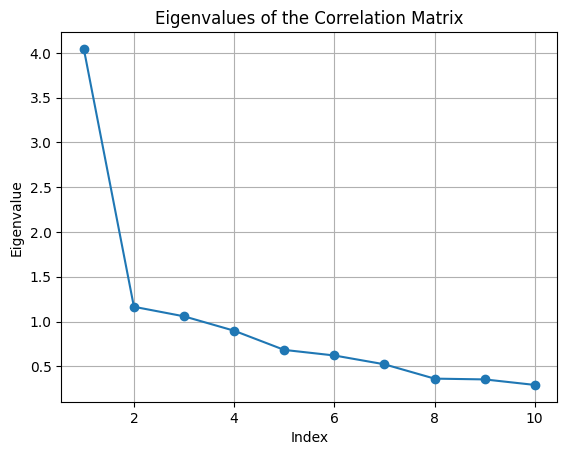

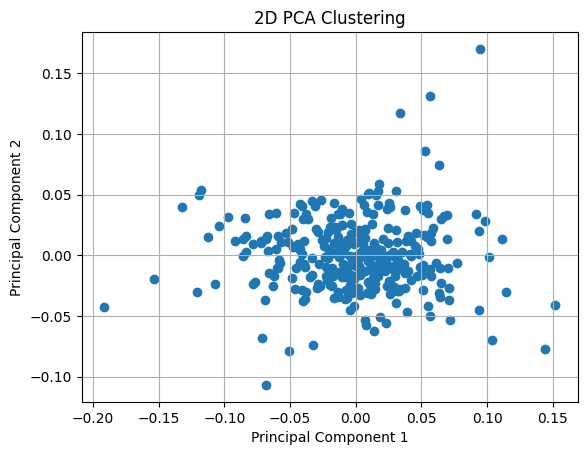

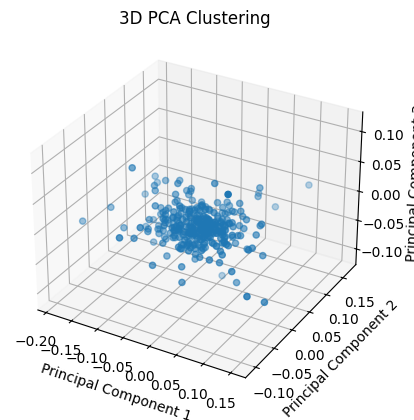

Short positions in Equal Weight PCA: [4 8]
Short positions: [0 4 7 8]


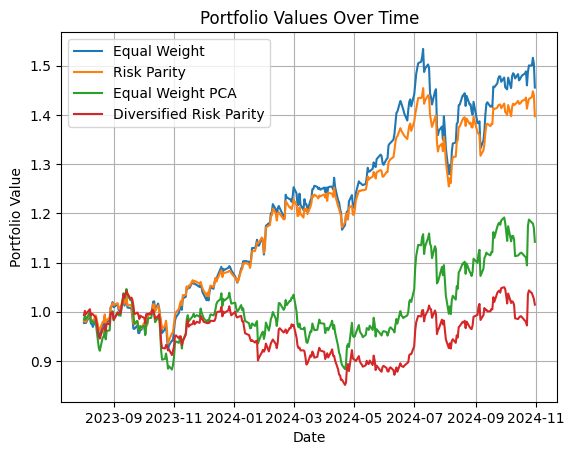

[**********************80%*************          ]  8 of 10 completed

Equal Weight: Total Return=0.404, Std Dev=0.013, Min Value=0.922
Risk Parity: Total Return=0.354, Std Dev=0.011, Min Value=0.935
Equal Weight PCA: Total Return=0.173, Std Dev=0.016, Min Value=0.883
Diversified Risk Parity: Total Return=0.038, Std Dev=0.012, Min Value=0.851
Equal Weight: Beta=1.513
Risk Parity: Beta=1.277
Equal Weight PCA: Beta=1.362
Diversified Risk Parity: Beta=0.776


[*********************100%***********************]  10 of 10 completed

Equal Weight Weights Shape: (10,)
Risk Parity Weights Shape: (10,)
Equal Weight PCA Weights Shape: (10,)
Diversified Risk Parity Weights Shape: (10,)
Equal Weight: Test Period Return=0.068
Risk Parity: Test Period Return=0.049
Equal Weight PCA: Test Period Return=0.082
Diversified Risk Parity: Test Period Return=0.101


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 股票代码和日期范围
tickers = ['NVDA', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'BRK-B', 'TSLA', 'AVGO', 'LLY']
index_ticker = '^GSPC'
start_date = '2023-08-01'
end_date = '2024-11-01'

# 下载数据
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
index_data = yf.download(index_ticker, start=start_date, end=end_date)['Adj Close']

# 计算每日对数收益率
log_returns = np.log(data / data.shift(1)).dropna()
index_log_returns = np.log(index_data / index_data.shift(1)).dropna()

# 计算相关矩阵
filtered_log_returns = log_returns.loc['2023-08-01':'2024-07-31']
correlation_matrix = filtered_log_returns.corr()

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# 输出特征值和特征向量
with np.printoptions(precision=3):
    print("Correlation Matrix:\n", correlation_matrix)
    print("Eigenvalues:\n", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)

# 按特征值降序排序
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 绘制特征值图像
plt.figure()
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.title('Eigenvalues of the Correlation Matrix')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('eigenvalues_plot.png')
plt.show()

# 计算累计方差
explained_variance_ratio = sorted_eigenvalues / sorted_eigenvalues.sum()
cumulative_variance = np.cumsum(explained_variance_ratio)

# 找到累计方差超过80%的主成分数量
num_components = np.argmax(cumulative_variance >= 0.8) + 1

# PCA 降维
pca = PCA(n_components=3)
principal_components = pca.fit_transform(log_returns)

# 可视化聚类 (2D)
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('2D PCA Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.savefig('pca_2d.png')
plt.show()

# 可视化聚类 (3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2])
ax.set_title('3D PCA Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.savefig('pca_3d.png')
plt.show()

# 定义计算权重的函数
def equal_weight_weights(log_returns):
    n_assets = log_returns.shape[1]
    weights = np.ones(n_assets) / n_assets
    return weights

def risk_parity_weights(log_returns):
    volatilities = log_returns.std()
    weights = 1 / volatilities
    weights /= weights.sum()
    return weights
    
def equal_weight_pca_weights(eigenvectors, num_components):
    # 确保符号一致
    n_assets = eigenvectors.shape[0]
    avg_vector = np.ones(n_assets) / n_assets
    for i in range(num_components):
        if np.dot(eigenvectors[:, i], avg_vector) < 0:
            eigenvectors[:, i] = -eigenvectors[:, i]
    pca_weights = eigenvectors[:, :num_components].mean(axis=1)
    short_positions = pca_weights < 0
    print("Short positions in Equal Weight PCA:", np.where(short_positions)[0])
    pca_weights /= pca_weights.sum()
    return pca_weights

def diversified_risk_parity_weights(eigenvalues, eigenvectors, num_components):
    portfolio_variances = eigenvalues[:num_components]
    weights = 1 / np.sqrt(portfolio_variances)
    weights /= weights.sum()
    asset_weights = eigenvectors[:, :num_components].dot(weights)
    # 标注空头仓位
    short_positions = asset_weights < 0
    print("Short positions:", np.where(short_positions)[0])
    asset_weights /= np.abs(asset_weights).sum()
    return asset_weights
    
# 在训练数据上计算权重
equal_weight_w = equal_weight_weights(log_returns)
risk_parity_w = risk_parity_weights(log_returns)
equal_weight_pca_w = equal_weight_pca_weights(sorted_eigenvectors, num_components)
div_risk_parity_w = diversified_risk_parity_weights(sorted_eigenvalues, sorted_eigenvectors, num_components)

# 计算组合收益率
equal_weight_returns = log_returns.dot(equal_weight_w)
risk_parity_returns = log_returns.dot(risk_parity_w)
equal_weight_pca_returns = log_returns.dot(equal_weight_pca_w)
div_risk_parity_returns = log_returns.dot(div_risk_parity_w)

# 将策略和对应的权重保存起来
strategies = {
    "Equal Weight": equal_weight_w,
    "Risk Parity": risk_parity_w,
    "Equal Weight PCA": equal_weight_pca_w,
    "Diversified Risk Parity": div_risk_parity_w,
}

# 绘制每日组合价值
equal_weight_value = (1 + equal_weight_returns).cumprod()
risk_parity_value = (1 + risk_parity_returns).cumprod()
equal_weight_pca_value = (1 + equal_weight_pca_returns).cumprod()
div_risk_parity_value = (1 + div_risk_parity_returns).cumprod()

plt.figure()
plt.plot(equal_weight_value, label='Equal Weight')
plt.plot(risk_parity_value, label='Risk Parity')
plt.plot(equal_weight_pca_value, label='Equal Weight PCA')
plt.plot(div_risk_parity_value, label='Diversified Risk Parity')
plt.title('Portfolio Values Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.savefig('portfolio_values.png')
plt.show()

# 计算收益率与标准差
def strategy_performance(portfolio_returns):
    total_return = portfolio_returns.sum()
    std_dev = portfolio_returns.std()
    min_value = (1 + portfolio_returns).cumprod().min()
    return total_return, std_dev, min_value

performance_results = {}
for name, returns in {
    "Equal Weight": equal_weight_returns,
    "Risk Parity": risk_parity_returns,
    "Equal Weight PCA": equal_weight_pca_returns,
    "Diversified Risk Parity": div_risk_parity_returns,
}.items():
    performance_results[name] = strategy_performance(returns)

# 打印结果
with np.printoptions(precision=3):
    for name, metrics in performance_results.items():
        print(f"{name}: Total Return={metrics[0]:.3f}, Std Dev={metrics[1]:.3f}, Min Value={metrics[2]:.3f}")

# Beta 系数计算（与之前相同）
def beta_coefficient(portfolio_returns, market_returns):
    # 对齐日期索引
    portfolio_returns, market_returns = portfolio_returns.align(market_returns, join='inner')
    # 确保数据为一维数组
    portfolio_returns = np.array(portfolio_returns).flatten()
    market_returns = np.array(market_returns).flatten()
    # 计算协方差和市场方差
    covariance = np.cov(portfolio_returns, market_returns)[0, 1]
    market_variance = market_returns.var()
    return covariance / market_variance

# 确保 market_returns 是 DataFrame 格式并对齐
market_returns = index_log_returns

# 计算每个策略的 Beta 系数
beta_results = {
    name: beta_coefficient(returns, market_returns) 
    for name, returns in {
        "Equal Weight": equal_weight_returns,
        "Risk Parity": risk_parity_returns,
        "Equal Weight PCA": equal_weight_pca_returns,
        "Diversified Risk Parity": div_risk_parity_returns,
    }.items()
}

# 打印 Beta 系数
with np.printoptions(precision=3):
    for name, beta in beta_results.items():
        print(f"{name}: Beta={beta:.3f}")

# 下载测试数据
test_data = yf.download(tickers, start='2024-08-01', end='2024-11-01')['Adj Close']
test_log_returns = np.log(test_data / test_data.shift(1)).dropna()

# 测试每种策略
test_results = {}
for name, weights in strategies.items():
    # 将权重转换为Series并对齐列
    weights = pd.Series(weights, index=log_returns.columns)
    # 对齐测试数据和权重的列
    weights = weights.reindex(test_log_returns.columns).fillna(0)
    # 确保权重之和为1
    weights /= weights.sum()
    # 打印权重形状
    print(f"{name} Weights Shape: {weights.shape}")
    # 计算测试期收益率
    test_returns = test_log_returns.dot(weights)
    test_results[name] = test_returns

# 打印测试结果
with np.printoptions(precision=3):
    for name, returns in test_results.items():
        total_return = returns.sum()  # 累积收益
        print(f"{name}: Test Period Return={total_return:.3f}")